Students Adaptivity level in Online Education.


Objective:
This is a dataset containing over 1205 Students and their characteristics. 
The goal is to find the best model to predict the Adaptivity Level of the Students. 


1. Explore this dataset using data preprocessing and data visualization 

2. Split your dataset into a training set and a testing set.  

3. Apply polynomial regression.

Note: Every result has to be interpreted and justified. Write your interpretations in a markdown.

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
# importing dataset

data = pd.read_csv("C:\\Users\\VALUEDSEED\\Downloads\\students_adaptability_level_online_education.csv")

data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [3]:
#DATA PREPROCESSING

In [4]:
#Checking the unique values of the dataset

data["Adaptivity Level"].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [5]:
data["Education Level"].unique()

array(['University', 'College', 'School'], dtype=object)

In [6]:
data["Age"].unique()

array(['21-25', '16-20', '11-15', '26-30', '6-10', '1-5'], dtype=object)

In [7]:
data["Financial Condition"].unique()

array(['Mid', 'Poor', 'Rich'], dtype=object)

In [8]:
data["Institution Type"].unique()

array(['Non Government', 'Government'], dtype=object)

In [9]:
data["Internet Type"].unique()

array(['Wifi', 'Mobile Data'], dtype=object)

In [10]:
data["Device"].unique()

array(['Tab', 'Mobile', 'Computer'], dtype=object)

In [11]:
data["Gender"].unique()

array(['Boy', 'Girl'], dtype=object)

In [12]:
data["Class Duration"].unique()

array(['3-6', '1-3', '0'], dtype=object)

In [13]:
den = LabelEncoder()
data['Gender']= den.fit_transform(data['Gender'])   

In [14]:
print(data['Gender'].unique())  

[0 1]


In [15]:
data.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [16]:
#LABEL ENCODING OF CATEGORICAL DATA TO NUMERICAL

In [17]:
data['Age']= den.fit_transform(data['Age'])
print(data['Age'].unique()) 

[3 2 1 4 5 0]


In [18]:
data['Education Level']= den.fit_transform(data['Education Level'])
print(data['Education Level'].unique()) 

[2 0 1]


In [19]:
data['Institution Type']= den.fit_transform(data['Institution Type'])
print(data['Institution Type'].unique())

[1 0]


In [20]:
data['IT Student']= den.fit_transform(data['IT Student'])
print(data['IT Student'].unique()) 

[0 1]


In [21]:
data['Location']= den.fit_transform(data['Location'])
print(data['Location'].unique()) 

[1 0]


In [22]:
data['Load-shedding']= den.fit_transform(data['Load-shedding'])
print(data['Load-shedding'].unique())

[1 0]


In [23]:
data['Financial Condition']= den.fit_transform(data['Financial Condition'])
print(data['Financial Condition'].unique())

[0 1 2]


In [24]:
data['Internet Type']= den.fit_transform(data['Internet Type'])
print(data['Internet Type'].unique())

[1 0]


In [25]:
data['Network Type']= den.fit_transform(data['Network Type'])
print(data['Network Type'].unique())

[2 1 0]


In [26]:
data['Class Duration']= den.fit_transform(data['Class Duration'])
print(data['Class Duration'].unique())

[2 1 0]


In [27]:
data['Self Lms']= den.fit_transform(data['Self Lms'])
print(data['Self Lms'].unique())

[0 1]


In [28]:
data['Device']= den.fit_transform(data['Device'])
print(data['Device'].unique())

[2 1 0]


In [29]:
data['Adaptivity Level']= den.fit_transform(data['Adaptivity Level'])
print(data['Adaptivity Level'].unique())

[2 1 0]


In [30]:
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,2,0,1,0,1,1,0,1,2,1,0,1,1
1201,1,2,0,1,0,0,0,0,1,2,2,0,1,2
1202,0,1,1,1,0,1,1,0,0,1,1,0,1,2
1203,1,2,0,1,0,0,1,0,1,2,1,0,1,1


In [31]:
#Getting the columns information from the dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               1205 non-null   int32
 1   Age                  1205 non-null   int32
 2   Education Level      1205 non-null   int32
 3   Institution Type     1205 non-null   int32
 4   IT Student           1205 non-null   int32
 5   Location             1205 non-null   int32
 6   Load-shedding        1205 non-null   int32
 7   Financial Condition  1205 non-null   int32
 8   Internet Type        1205 non-null   int32
 9   Network Type         1205 non-null   int32
 10  Class Duration       1205 non-null   int32
 11  Self Lms             1205 non-null   int32
 12  Device               1205 non-null   int32
 13  Adaptivity Level     1205 non-null   int32
dtypes: int32(14)
memory usage: 66.0 KB


In [32]:
#Checking for missing values

data.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

DATA VISUALIZATION

<AxesSubplot:title={'center':'Bar plot of Education Level'}, xlabel='Education Level', ylabel='Adaptivity Level'>

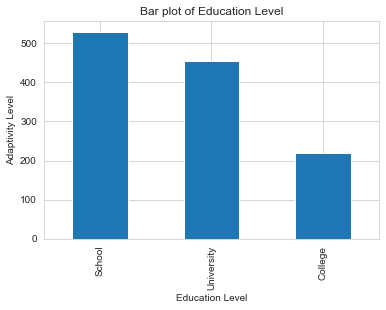

In [137]:
#Visualization with Education Level using a bar graph
plt.xlabel("Education Level")
plt.ylabel("Adaptivity Level")
plt.title("Bar plot of Education Level")
vc = data["Education Level"].value_counts()
vc.plot.bar(rot=90)

#The students with school educational level has the highest adaptivity level followed by University and the college students respectively

<AxesSubplot:title={'center':'Bar plot of Internet Type'}, xlabel='Internet Type', ylabel='Adaptivity Level'>

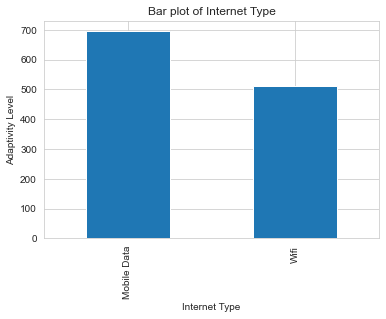

In [138]:
#Visualization with Internet Type using a bar graph
plt.xlabel("Internet Type")
plt.ylabel("Adaptivity Level")
plt.title("Bar plot of Internet Type")
vc = data["Internet Type"].value_counts()
vc.plot.bar(rot=90)

#Students using mobile data has the highest adaptivity level than Wifi users

<AxesSubplot:title={'center':'Bar plot of Network Type'}, xlabel='Network Type', ylabel='Adaptivity Level'>

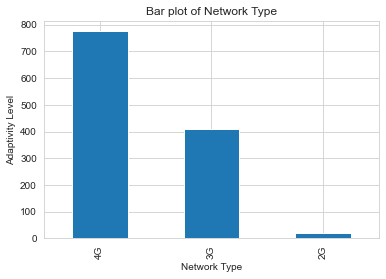

In [140]:
#Visualization with Network Type using a bar graph
plt.xlabel("Network Type")
plt.ylabel("Adaptivity Level")
plt.title("Bar plot of Network Type")
vc = data["Network Type"].value_counts()
vc.plot.bar(rot=90)

#Students with the 4G internet networks adapts to online education more because its faster, followed by 3G and lastly 2G.

<AxesSubplot:title={'center':'Bar plot of Gender'}, xlabel='Gender', ylabel='Adaptivity Level'>

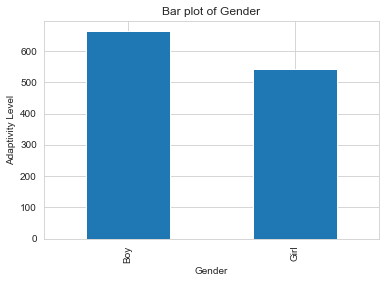

In [141]:
#Visualization with Education Level using a bar graph
plt.xlabel("Gender")
plt.ylabel("Adaptivity Level")
plt.title("Bar plot of Gender")
vc = data["Gender"].value_counts()
vc.plot.bar(rot=90)

#The Boy Gender adaptivity level to online education is higher than the Girl Gender.

<AxesSubplot:title={'center':'Bar plot of Financial Condition'}, xlabel='Financial Condition', ylabel='Financial Condition'>

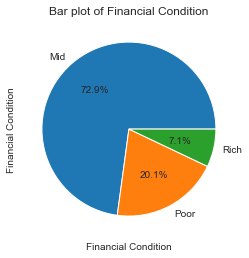

In [142]:
#Visualization with region using a pie chart

plt.xlabel("Financial Condition")
plt.ylabel("Adaptivity Level")
plt.title("Bar plot of Financial Condition")

explode=(0, 0, 0.1),

vc = data["Financial Condition"].value_counts()
vc.plot.pie(rot=0, autopct='%1.1f%%', startangle = 0)


#Using a Pie Chart, the average students financial condition towards online education is higher than the Poor and the Rich students.

<AxesSubplot:title={'center':'Bar plot of Age'}, xlabel='Age', ylabel='Age'>

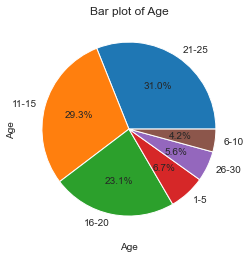

In [143]:
#Visualization with region using a pie chart

plt.xlabel("Age")
plt.ylabel("Adaptivity Level")
plt.title("Bar plot of Age")

explode=(0, 0, 0.1),

vc = data["Age"].value_counts()
vc.plot.pie(rot=0, autopct='%1.1f%%', startangle = 0)

#The age brackets (21 - 25) has the highest percentage of adaptivity level followed by (11 - 15) while age 6 - 10 takes the lowest percentage.

<AxesSubplot:title={'center':'Bar plot of Device'}, xlabel='Device', ylabel='Device'>

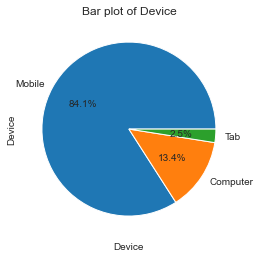

In [144]:
#Visualization with region using a pie chart

plt.xlabel("Device")
plt.ylabel("Adaptivity Level")
plt.title("Bar plot of Device")

explode=(0, 0, 0.1),

vc = data["Device"].value_counts()
vc.plot.pie(rot=0, autopct='%1.1f%%', startangle = 0)

#The adaptivity level of students using Mobile devices has 84.1% followed by Computer and finally the students using Tabs.

<AxesSubplot:title={'center':'Bar plot of Age'}, xlabel='Age', ylabel='Age counts'>

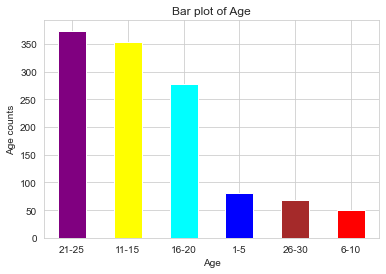

In [145]:
#visualization of age using barplots
plt.xlabel("Age")
plt.ylabel("Age counts")
plt.title("Bar plot of Age")
vc = data["Age"].value_counts()
vc.plot.bar(rot=0, color = ["purple", "yellow", "cyan", "blue", "brown", "red"])

##Using a barplot, the age brackets (21 - 25) has the highest percentage of adaptivity level followed by (11 - 15) while age 6 - 10 takes the lowest percentage.

<AxesSubplot:xlabel='Age', ylabel='count'>

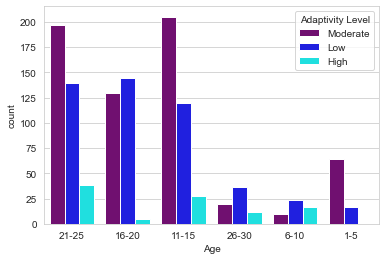

In [146]:
#Seaborn Analysis 
#Checking out the Age based on the region.

sn.countplot(data = data, x= "Age", palette = ["purple", "blue", "cyan"], hue = "Adaptivity Level")

#This plot shows the adaptivity level of the different age brackets i.e. the moderate, low and high.

<AxesSubplot:xlabel='Internet Type', ylabel='count'>

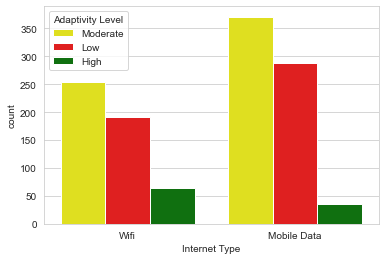

In [147]:
sn.countplot(data = data, x= "Internet Type", palette = ["yellow", "red", "green"], hue = "Adaptivity Level")

#The plot shows the adaptivity level of students using mobile data and wifi i.e. students with Moderacy, high and low.

<AxesSubplot:ylabel='Education Level'>

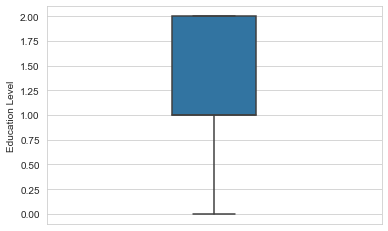

In [169]:
sn.set_style("whitegrid")


sn.boxplot(y= "Education Level", data = data, width = 0.25)

#There was no outfliers in the data. the data falls within 1 and 2 for the education level

In [170]:
data.corr()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
Gender,1.000000,-0.130395,-0.197743,0.106910,-0.233284,-0.034231,0.059998,-0.017410,-0.021589,-0.032527,-0.035407,-0.138331,0.140691,0.033426
Age,-0.130395,1.000000,0.414985,-0.216818,0.320066,-0.187269,-0.122011,0.028792,0.203195,-0.049077,0.065048,0.246289,-0.171172,-0.230317
Education Level,-0.197743,0.414985,1.000000,0.116403,0.415967,0.063676,0.004725,0.083509,0.080694,-0.046162,0.165127,0.326259,-0.278548,-0.032694
Institution Type,0.106910,-0.216818,0.116403,1.000000,0.104185,0.326813,-0.017794,0.013586,0.060198,-0.060035,0.348251,0.096722,-0.096857,0.162387
IT Student,-0.233284,0.320066,0.415967,0.104185,1.000000,0.009697,-0.186005,-0.025075,0.113452,-0.128817,0.228662,0.453429,-0.386776,0.049282
Location,-0.034231,-0.187269,0.063676,0.326813,0.009697,1.000000,0.245380,0.056958,0.222660,0.171539,0.216953,-0.036443,-0.070397,0.107414
Load-shedding,0.059998,-0.122011,0.004725,-0.017794,-0.186005,0.245380,1.000000,-0.001017,-0.013199,0.164678,-0.119729,-0.187610,0.052088,0.043611
Financial Condition,-0.017410,0.028792,0.083509,0.013586,-0.025075,0.056958,-0.001017,1.000000,-0.020469,-0.019926,0.023791,-0.064362,-0.020968,-0.274643
Internet Type,-0.021589,0.203195,0.080694,0.060198,0.113452,0.222660,-0.013199,-0.020469,1.000000,0.335989,0.250804,0.084661,-0.250007,-0.084276
Network Type,-0.032527,-0.049077,-0.046162,-0.060035,-0.128817,0.171539,0.164678,-0.019926,0.335989,1.000000,-0.019866,-0.207056,-0.063738,0.021647


In [171]:
def plot_correlation_map( data ):
    
    corr = data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sn.diverging_palette( 220 , 10 , as_cmap = True )

    s = sn.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 })

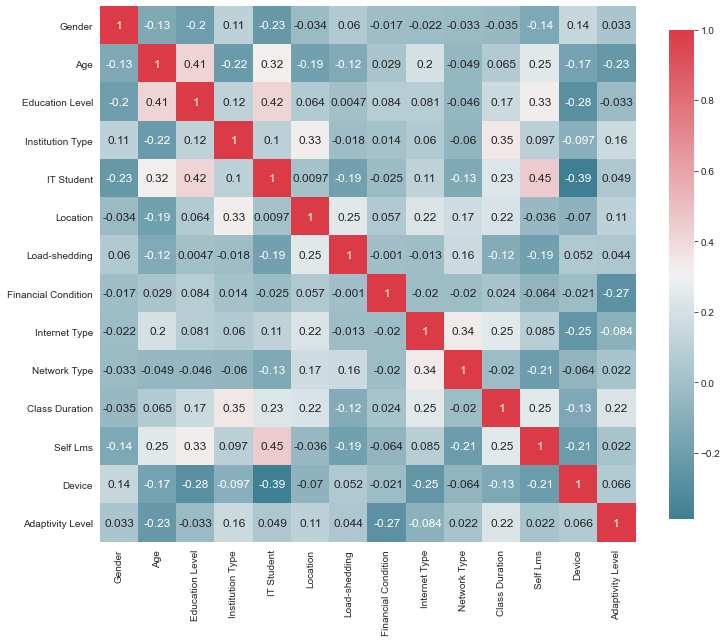

In [172]:
plot_correlation_map(data)

In [33]:
#Following the results of thie Heatmap chat, the correlation between the features with adaptivity level. 

In [34]:
#TESTING MODEL

In [35]:
#splitting out data into train and test split

x = data[['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level']]

y = data["Adaptivity Level"]

In [36]:
np.array(x)
np.array(y)

array([2, 2, 2, ..., 2, 1, 2])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 )

In [38]:
sc = StandardScaler()
data1 = sc.fit_transform(x)

data1

array([[-0.90415498,  0.72502676,  1.11241884, ..., -0.45940753,
         2.89060981,  0.87934302],
       [ 1.10600508,  0.72502676,  1.11241884, ...,  2.17671662,
         0.28538556,  0.87934302],
       [ 1.10600508, -0.10151746, -1.65713632, ..., -0.45940753,
         0.28538556,  0.87934302],
       ...,
       [-0.90415498, -0.92806169, -0.27235874, ..., -0.45940753,
         0.28538556,  0.87934302],
       [ 1.10600508, -0.10151746, -1.65713632, ..., -0.45940753,
         0.28538556, -0.67890454],
       [ 1.10600508, -0.92806169, -0.27235874, ..., -0.45940753,
         0.28538556,  0.87934302]])

In [39]:
Test = pd.DataFrame(data1)

Test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.904155,0.725027,1.112419,0.681290,-0.580864,0.537373,0.447436,-0.565091,1.167367,0.723409,1.737449,-0.459408,2.890610,0.879343
1,1.106005,0.725027,1.112419,0.681290,-0.580864,0.537373,-2.234955,-0.565091,-0.856629,0.723409,-0.086267,2.176717,0.285386,0.879343
2,1.106005,-0.101517,-1.657136,-1.467805,-0.580864,0.537373,0.447436,-0.565091,1.167367,0.723409,-0.086267,-0.459408,0.285386,0.879343
3,1.106005,-0.928062,-0.272359,0.681290,-0.580864,0.537373,0.447436,-0.565091,-0.856629,0.723409,-0.086267,-0.459408,0.285386,0.879343
4,1.106005,-0.101517,-0.272359,0.681290,-0.580864,0.537373,0.447436,1.087664,-0.856629,-1.218034,-1.909983,-0.459408,0.285386,-0.678905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.106005,-0.101517,-1.657136,0.681290,-0.580864,0.537373,0.447436,-0.565091,1.167367,0.723409,-0.086267,-0.459408,0.285386,-0.678905
1201,1.106005,-0.101517,-1.657136,0.681290,-0.580864,-1.860904,-2.234955,-0.565091,1.167367,0.723409,1.737449,-0.459408,0.285386,0.879343
1202,-0.904155,-0.928062,-0.272359,0.681290,-0.580864,0.537373,0.447436,-0.565091,-0.856629,-1.218034,-0.086267,-0.459408,0.285386,0.879343
1203,1.106005,-0.101517,-1.657136,0.681290,-0.580864,-1.860904,0.447436,-0.565091,1.167367,0.723409,-0.086267,-0.459408,0.285386,-0.678905


In [40]:
x = Test.iloc[:,:-1]
y = Test.iloc[:,-1]

In [ ]:
#building our model - multiple linear Regression Model

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

target = linear_model.predict(x_test)


target

In [43]:
print(mean_squared_error(y_test, target))

print(metrics.r2_score(y_test, target))

1.1305183365536212e-30
1.0


In [44]:
#SIMPLE LINEAR REGRESSION

In [45]:
x = Test.iloc[:, 1: -1].values #selecting the relevant features and representing it with variable x
y = Test.iloc[:, -1:].values #representing the output with variable y

In [46]:
#Using Education Level to predict Adaptivity Level

x_Education_Level = Test.iloc[:, 2]
y_Education_Level = Test.iloc[:, -1]

In [47]:
x_train_Education_Level, x_test_Education_Level, y_train_Education_Level, y_test_Education_Level = train_test_split(x_Education_Level,y_Education_Level, test_size = 0.2 )

In [48]:
x_train_Education_Level= np.array(x_train_Education_Level).reshape(-1, 1)
x_test_Education_Level = np.array(x_test_Education_Level).reshape(-1, 1)
y_train_Education_Level = np.array(y_train_Education_Level).reshape(-1, 1)
y_test_Education_Level = np.array(y_test_Education_Level).reshape(-1, 1)

In [49]:
#Building our model - Simple Linear Regression 

Proj = LinearRegression()

In [ ]:
lin = LinearRegression()

lin.fit(x_train_Education_Level, y_train_Education_Level)

tip = lin.predict(x_test_Education_Level)


tip

In [51]:
print("MSE: ", mean_squared_error(y_test_Education_Level, tip))
print("R squared: ", metrics.r2_score(y_test_Education_Level, tip))

MSE:  0.9096366843953356
R squared:  -0.010144358901412298


In [52]:
#Using Institution Type to predict Adaptivity Level

x_Institution_Type = Test.iloc[:, 3]
y_Institution_Type = Test.iloc[:, -1]

In [53]:
x_train_Institution_Type, x_test_Institution_Type, y_train_Institution_Type, y_test_Institution_Type = train_test_split(x_Institution_Type,y_Institution_Type, test_size = 0.2 )


In [54]:
x_train_Institution_Type = np.array(x_train_Institution_Type).reshape(-1, 1)
x_test_Institution_Type = np.array(x_test_Institution_Type).reshape(-1, 1)
y_train_Institution_Type = np.array(y_train_Institution_Type).reshape(-1, 1)
y_test_Institution_Type = np.array(y_test_Institution_Type).reshape(-1, 1)

In [ ]:
line = LinearRegression()

line.fit(x_train_Institution_Type, y_train_Institution_Type)

tip = line.predict(x_test_Institution_Type)

tip

In [56]:
print("MSE: ", mean_squared_error(y_test_Institution_Type, tip))
print("R squared: ", metrics.r2_score(y_test_Institution_Type, tip))

MSE:  1.1816094428914876
R squared:  -0.0369101868796089


In [57]:
###Training the Polynomial Regression model on the dataset

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree= 4)

In [61]:
x_poly = poly_reg.fit_transform(x)

lin_reg_2 = LinearRegression()

lin_reg_2.fit(x_poly, y)

LinearRegression()

In [63]:
print("Intercept constant for our linear model: ", lin_reg_2.intercept_)
print("Coefficient of x for our linear model: ", lin_reg_2.coef_)

Intercept constant for our linear model:  [2.06013094e+12]
Coefficient of x for our linear model:  [[-4.02083426e+11 -1.73494454e+12 -5.11050310e+11 ... -8.31649499e+10
  -1.34105114e+11  1.63367425e+11]]


In [64]:
##Visualising the Polynomial Regression results

In [65]:
y_poly_pred_2 = lin_reg_2.predict(x_poly)

y_poly_pred_2

array([[ 0.93237305],
       [ 0.9753418 ],
       [-0.06274414],
       ...,
       [ 0.66674805],
       [-0.68579102],
       [-0.24584961]])

In [67]:
y_poly_pred_2 = poly_reg.fit_transform(x)

lin_reg_2 = LinearRegression()

lin_reg_2.fit(x_poly, y)

LinearRegression()